# Anexo III
https://colab.research.google.com/drive/12bG77xofR6O68WCcwwAInA3H5YDFPxlI#scrollTo=a-Lgs9Lq12-i

## Pre-ejercicio 

Celdas para descargar las imagenes

In [1]:
# Descargando primer set de imagenes
!wget -q http://lapi.fi-p.unam.mx/wp-content/uploads/Imagenes.zip
!unzip -q Imagenes.zip
# Descargando segundo set de imagenes
!wget -q http://lapi.fi-p.unam.mx/wp-content/uploads/Imagenes2.zip
!unzip -q Imagenes2.zip
# instalación biblioteca
!pip install pydicom

     |████████████████████████████████| 2.0 MB 14.2 MB/s 


## **4.1.** De la carpeta de imágenes: realiza las siguientes actividades.


### **4.1.1.**Desarrolla un script para leer y desplegar cada imagen con los paquetes de Matplotlib, OpenCV, Scikit-Image, PIL y Sci-Py.
### **4.1.2.**.Imprimir el tipo de imagen, el tamaño y el tipo de dato


In [2]:
# Se ocupará os para obtener la ruta de los archivos
import os

listaImagenes = []
for carpeta in ["Imagenes","imagenes2"]:
  for name in os.listdir("/content/"+carpeta):
    listaImagenes.append("/content/"+carpeta+"/"+name)

#### **Matplotlib**

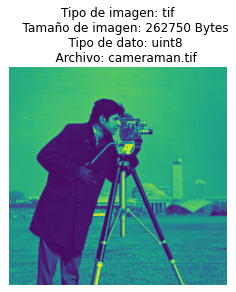

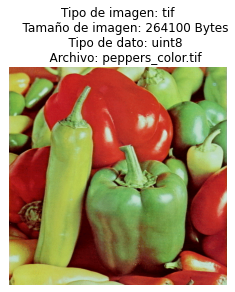

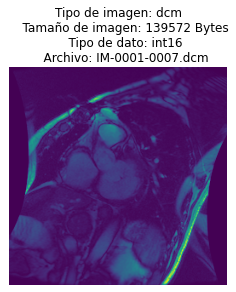

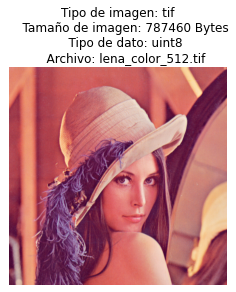

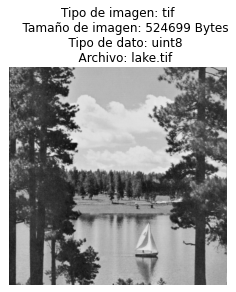

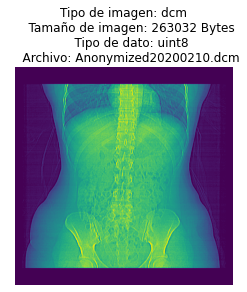

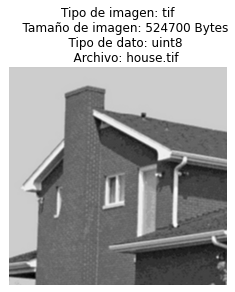

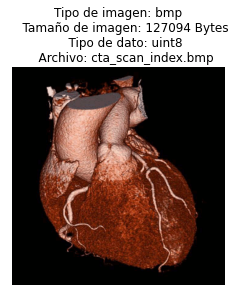

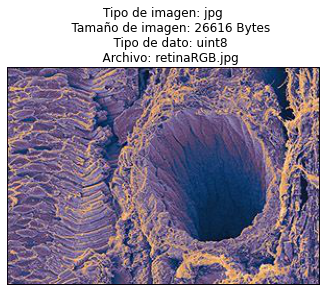

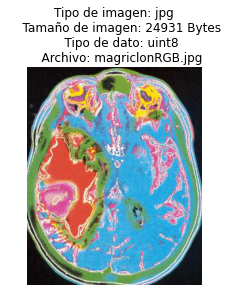

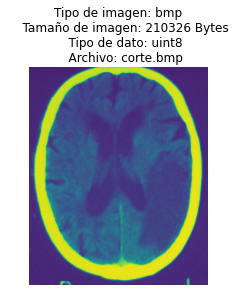

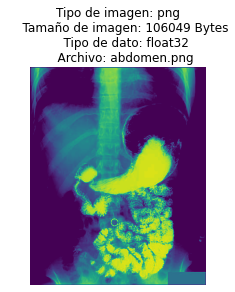

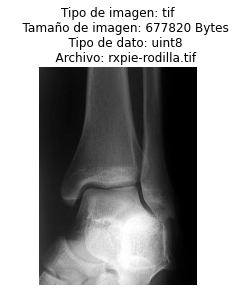

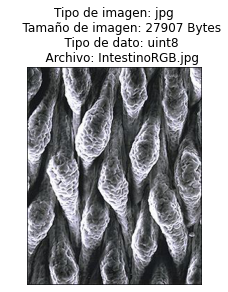

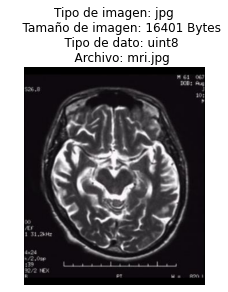

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# se usa para formados dcm
import pydicom as dicom


# para cada imagen
for imagePath in listaImagenes:
  # siempre que no sea una imagen tipo dcm o raw
  # PREGUNTA: Se puede leer una imagen .dcm o .raw con matplotlib?
  if imagePath.endswith(".dcm"):
    fig, ax1 = plt.subplots(1,1)
    ds = dicom.dcmread(imagePath)
    Texto = """Tipo de imagen: {0}
    Tamaño de imagen: {1} Bytes
    Tipo de dato: {2}
    Archivo: {3}""".format(imagePath[-3:],os.stat(imagePath).st_size,
                           ds.pixel_array.dtype,imagePath.split("/")[-1])
    ax1.imshow(ds.pixel_array)
    ax1.set_title(Texto)
    ax1.axis("off")
  elif not imagePath.endswith(".raw"):
    fig, ax1 = plt.subplots(1,1)
    img = mpimg.imread(imagePath)
    Texto = """Tipo de imagen: {0}
    Tamaño de imagen: {1} Bytes
    Tipo de dato: {2}
    Archivo: {3}""".format(imagePath[-3:],os.stat(imagePath).st_size,
                           img.dtype,imagePath.split("/")[-1])
    ax1.imshow(img)
    ax1.set_title(Texto)
    ax1.axis("off")

In [ ]:
# para formato raw
import numpy as np

# tamaño de la imagen
rows = 600
columns = 800

# leer el archivo
file = open("/content/Imagenes/rosa800x600.raw")

# comvirtiendo a un arreglo numpy
img = np.fromfile(file, dtype = np.uint8, count = rows * columns)
print("shape original:",img.shape)
print("size original:",img.size)
# cambiamos las dimensiones de la imagen
img.shape = (img.size // columns, columns)
print("new shape:",img.shape)
print("new size:",img.size)

# Mostrando la imagen
fig, ax1 = plt.subplots(1,1)
ax1.imshow(img)
Texto = """Tipo de imagen: {0}
Tamaño de imagen: {1} Bytes
Tipo de dato: {2}
Archivo: {3}""".format("raw",
                      os.stat("/content/Imagenes/rosa800x600.raw").st_size,
                      img.dtype,"rosa800x600.raw")
ax1.set_title(Texto)
ax1.axis("off")

comentario = """
Matplotlib can only read PNGs natively. Further image formats are
supported via the optional dependency on Pillow. Note, URL strings
are not compatible with Pillow. Check the Pillow documentation_
for more information.
"""

# https://towardsdatascience.com/reading-an-image-in-python-without-using-special-libraries-534b57de7dd4

#### **OpenCV**

In [ ]:
import cv2 
# Se ocupa, Colab tiene deshabilitado el imshow de opencv, crashea las sesiones
from google.colab.patches import cv2_imshow

# para cada imagen
for imagePath in listaImagenes:
  if not (imagePath.endswith(".dcm") or imagePath.endswith(".raw")):
    img = cv2.imread(imagePath)
    Texto = """Tipo de imagen: {0}
Tamaño de imagen: {1} Bytes
Tipo de dato: {2}
Archivo: {3}""".format(imagePath[-3:],
                      os.stat(imagePath).st_size,
                      img.dtype,imagePath.split("/")[-1])
    print(Texto)
    cv2_imshow(img)
    # cv2.imshow(img)
comentario = """
.   -   Windows bitmaps - \*.bmp, \*.dib (always supported)
.   -   JPEG files - \*.jpeg, \*.jpg, \*.jpe (see the *Note* section)
.   -   JPEG 2000 files - \*.jp2 (see the *Note* section)
.   -   Portable Network Graphics - \*.png (see the *Note* section)
.   -   WebP - \*.webp (see the *Note* section)
.   -   Portable image format - \*.pbm, \*.pgm, \*.ppm \*.pxm, \*.pnm (always supported)
.   -   PFM files - \*.pfm (see the *Note* section)
.   -   Sun rasters - \*.sr, \*.ras (always supported)
.   -   TIFF files - \*.tiff, \*.tif (see the *Note* section)
.   -   OpenEXR Image files - \*.exr (see the *Note* section)
.   -   Radiance HDR - \*.hdr, \*.pic (always supported)
.   -   Raster and Vector geospatial data supported by GDAL (see the *Note* section)
"""
# https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/

#### **Scikit-Image**

In [ ]:
from skimage import io

# para cada imagen
for imagePath in listaImagenes:
  # Pone restricciones de tamaño, no especificamente del formato
  if imagePath.endswith(".png") or imagePath.endswith(".jpg"):
    img = io.imread(imagePath)
    Texto = """Tipo de imagen: {0}
Tamaño de imagen: {1} Bytes
Tipo de dato: {2}
Archivo: {3}""".format(imagePath[-3:],
                      os.stat(imagePath).st_size,
                      img.dtype,imagePath.split("/")[-1])
    fig, ax1 = plt.subplots(1,1)
    io.imshow(img,axes=ax1)
    ax1.set_title(Texto)
    ax1.axis("off")
    io.show()
  elif imagePath.endswith(".tif") or imagePath.endswith(".bmp"):
    if imagePath not in ["/content/imagenes2/rxpie-rodilla.tif"]:
      img = io.imread(imagePath,plugin='pil')
      Texto = """Tipo de imagen: {0}
Tamaño de imagen: {1} Bytes
Tipo de dato: {2}
Archivo: {3}""".format(imagePath[-3:],
                      os.stat(imagePath).st_size,
                      img.dtype,imagePath.split("/")[-1])
      fig, ax1 = plt.subplots(1,1)
      io.imshow(img,axes=ax1)
      ax1.set_title(Texto)
      ax1.axis("off")
      io.show()

img = io.imread("/content/imagenes2/rxpie-rodilla.tif")
Texto = """Tipo de imagen: tif
Tamaño de imagen: {0} Bytes
Tipo de dato: {1}
Archivo: rxpie-rodilla.tif""".format(os.stat("/content/imagenes2/rxpie-rodilla.tif").st_size,
                      img.dtype)
fig, ax1 = plt.subplots(1,1)
io.imshow(img,axes=ax1)
ax1.set_title(Texto)
ax1.axis("off")
io.show()
#https://numython.github.io/posts/2016/01/introduccion-scikit-image-procesamiento/

#### **PIL**

In [ ]:
from PIL import Image

# lee todas bien menos el formato .raw
imag = Image.open("/content/imagenes2/mri.jpg") 
imag
imag = Image.open("/content/imagenes2/abdomen.png") 
imag
imag = Image.open("/content/imagenes2/rxpie-rodilla.tif") 
imag
imag = Image.open("/content/imagenes2/cta_scan_index.bmp") 
imag

# https://pythonexamples.org/python-pillow-read-image/
# https://www.geeksforgeeks.org/python-pil-image-open-method/#:~:text=PIL.-,Image.,call%20the%20load()%20method).

#### **Sci-Py** 

La lectura de imagenes con misc esta descontinuada, se prefiere utilizar imageio

https://docs.scipy.org/doc/scipy-1.2.1/reference/generated/scipy.misc.imread.html

In [ ]:
import matplotlib.pyplot as plt
from scipy import misc
import imageio

for imagePath in listaImagenes:
  # solo jpg o png
  if imagePath.endswith(".jpg") or imagePath.endswith(".png"):
    img = imageio.imread(imagePath)
    Texto = """Tipo de imagen: {0}
    Tamaño de imagen: {1} Bytes
    Tipo de dato: {2}
    Archivo: {3}""".format(imagePath[-3:],os.stat(imagePath).st_size,
                           img.dtype,imagePath.split("/")[-1])
    plt.imshow(img)
    plt.title(Texto)
    plt.axis("off")
    plt.show()


### **4.1.3.**De las imágenes “lena_color_512.tif”, “peppers_color.tif”. Desarrolla un script con OpenCV y Scikit-Image para cambiar el espacio de color de:

#### **4.1.3.1.**RGB a Escala de grises  

##### Open CV

In [ ]:
#OpenCV
#https://www.delftstack.com/es/howto/python/convert-image-to-grayscale-python/#convertir-una-imagen-a-escala-de-grises-en-python-usando-el-m%25C3%25A9todo-cv2.imread-de-la-biblioteca-opencv
import cv2 
from google.colab.patches import cv2_imshow

# se ocupa el parámetro 0 para leerlo en escala de grises
# Imagen 1
print("lena_color_512.tif")
imgGray = cv2.imread("/content/Imagenes/lena_color_512.tif",0)
cv2_imshow(imgGray)

#Imagen 2
print("peppers_color.tif")
imgGray = cv2.imread("/content/Imagenes/peppers_color.tif",0)
cv2_imshow(imgGray)

##### Scikit-Image

In [ ]:
#Scikit-Image
from skimage import color
from skimage import io
from skimage.external.tifffile import imshow as skimshow

# Imagen 1
img = io.imread("/content/Imagenes/lena_color_512.tif",plugin='pil')
imgGray = color.rgb2gray(img)
fig, ax1 = plt.subplots(1,1)
io.imshow(imgGray,axes=ax1)
ax1.set_title("peppers_color.tif")
ax1.axis("off")
io.show()

# Imagen 2
img = io.imread("/content/Imagenes/peppers_color.tif",plugin='pil')
imgGray = color.rgb2gray(img)
fig, ax1 = plt.subplots(1,1)
io.imshow(imgGray,axes=ax1)
ax1.set_title("peppers_color.tif")
ax1.axis("off")
io.show()


#### **4.1.3.2.**RGB a YUV

##### OpenCV

In [ ]:
#OpenCV
import cv2 
from google.colab.patches import cv2_imshow

print("lena_color_512.tif")
img = cv2.imread("/content/Imagenes/lena_color_512.tif")
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
cv2_imshow(img_yuv)

print("peppers_color.tif")
img = cv2.imread("/content/Imagenes/peppers_color.tif")
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
cv2_imshow(img_yuv)

##### Scikit-Image

In [ ]:
#Scikit-Image
#https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2yuv
from skimage import color
from skimage import io

img = io.imread("/content/Imagenes/lena_color_512.tif",plugin='pil')
img_yuv = color.rgb2yuv(img)

#img_yuv = ((img_yuv+1)/2)*255
#img_yuv = img_yuv.astype('uint32')

fig, ax1 = plt.subplots(1,1)
io.imshow(img_yuv,axes=ax1)
ax1.set_title("lena_color_512.tif")
ax1.axis("off")
io.show()

img = io.imread("/content/Imagenes/peppers_color.tif",plugin='pil')
img_yuv = color.rgb2yuv(img)
fig, ax1 = plt.subplots(1,1)
io.imshow(img_yuv,axes=ax1)
ax1.set_title("peppers_color.tif")
ax1.axis("off")
io.show()

#### **4.1.3.3.**RGB a HSV

##### OpenCV

In [ ]:
#OpenCV
#https://unipython.com/cambiando-espacios-color/ 
import cv2 
from google.colab.patches import cv2_imshow

print("lena_color_512.tif")
img = cv2.imread("/content/Imagenes/lena_color_512.tif")

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(img_hsv)
#img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#cv2_imshow(img_hsv)

print("peppers_color.tif")
img = cv2.imread("/content/Imagenes/peppers_color.tif")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(img_hsv)

##### Scikit-Image

In [ ]:
#Scikit-Image
#https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2hsv
from skimage import color
from skimage import io

img = io.imread("/content/Imagenes/lena_color_512.tif",plugin='pil')
img_hsv = color.rgb2hsv(img)
fig, ax1 = plt.subplots(1,1)
io.imshow(img_hsv,axes=ax1)
ax1.set_title("lena_color_512.tif")
ax1.axis("off")
io.show()

img = io.imread("/content/Imagenes/peppers_color.tif",plugin='pil')
img_hsv = color.rgb2hsv(img)
fig, ax1 = plt.subplots(1,1)
io.imshow(img_hsv,axes=ax1)
ax1.set_title("peppers_color.tif")
ax1.axis("off")
io.show()

# Sale muy diferente openCV con Scikit Image, y el YUV sigue sin salir

#### **4.1.3.4.**Despliega la paleta de colores de RGB por separado

##### OpenCV

In [ ]:
#OpenCV
import cv2 
from google.colab.patches import cv2_imshow

print("lena_color_512.tif")
image = cv2.imread("/content/Imagenes/lena_color_512.tif")
(B, G, R) = cv2.split(image)
zeros = np.zeros(image.shape[:2], dtype="uint8")
cv2_imshow(cv2.merge([zeros, zeros, R]))
cv2_imshow(cv2.merge([zeros, G, zeros]))
cv2_imshow(cv2.merge([B, zeros, zeros]))

print("peppers_color.tif")
image = cv2.imread("/content/Imagenes/peppers_color.tif")
(B, G, R) = cv2.split(image)
zeros = np.zeros(image.shape[:2], dtype="uint8")
cv2_imshow(cv2.merge([zeros, zeros, R]))
cv2_imshow(cv2.merge([zeros, G, zeros]))
cv2_imshow(cv2.merge([B, zeros, zeros]))

##### Scikit-Image

In [ ]:
#Scikit-Image
from skimage import color
from skimage import io
import numpy as np

img = io.imread("/content/Imagenes/lena_color_512.tif",plugin='pil')
fig, ax1 = plt.subplots(1,1)
io.imshow(img,axes=ax1)
ax1.set_title("lena_color_512.tif")
ax1.axis("off")
io.show()

red_img = img.copy()
red_img[:,:,1] = 0
red_img[:,:,2] = 0
fig, ax1 = plt.subplots(1,1)
io.imshow(red_img,axes=ax1)
ax1.set_title("red")
ax1.axis("off")
io.show()

green_img = img.copy()
green_img[:,:,0] = 0
green_img[:,:,2] = 0
fig, ax1 = plt.subplots(1,1)
io.imshow(green_img,axes=ax1)
ax1.set_title("green")
ax1.axis("off")
io.show()

blue_img = img.copy()
blue_img[:,:,0] = 0
blue_img[:,:,1] = 0
fig, ax1 = plt.subplots(1,1)
io.imshow(blue_img,axes=ax1,cmap="Blues")
ax1.set_title("blue")
ax1.axis("off")
io.show()

img = io.imread("/content/Imagenes/peppers_color.tif",plugin='pil')
fig, ax1 = plt.subplots(1,1)
io.imshow(img,axes=ax1)
ax1.set_title("peppers_color.tif")
ax1.axis("off")
io.show()

red_img = img.copy()
red_img[:,:,1] = 0
red_img[:,:,2] = 0
fig, ax1 = plt.subplots(1,1)
io.imshow(red_img,axes=ax1)
ax1.set_title("red")
ax1.axis("off")
io.show()

green_img = img.copy()
green_img[:,:,0] = 0
green_img[:,:,2] = 0
fig, ax1 = plt.subplots(1,1)
io.imshow(green_img,axes=ax1)
ax1.set_title("green")
ax1.axis("off")
io.show()

blue_img = img.copy()
blue_img[:,:,0] = 0
blue_img[:,:,1] = 0
fig, ax1 = plt.subplots(1,1)
io.imshow(blue_img,axes=ax1,cmap="Blues")
ax1.set_title("blue")
ax1.axis("off")
io.show()

#### **4.1.3.5.**Despliega la paleta de colores HSV por separado

##### OpenCV

In [ ]:
#OpenCV
import cv2 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

print("lena_color_512.tif")
img = cv2.imread("/content/Imagenes/lena_color_512.tif")

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
(hue_img, s_img, value_img) = cv2.split(img_hsv)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8, 2))
cv2_imshow(img)

ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')
ax3.imshow(s_img)
ax3.set_title("S channel")
ax3.axis('off')

fig.tight_layout()

In [ ]:
import cv2 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

print("peppers_color.tif")
img = cv2.imread("/content/Imagenes/peppers_color.tif")

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
(hue_img, s_img, value_img) = cv2.split(img_hsv)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8, 2))
cv2_imshow(img)

ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img, cmap='hsv')
ax2.set_title("Value channel")
ax2.axis('off')
ax3.imshow(s_img, cmap='hsv')
ax3.set_title("S channel")
ax3.axis('off')

fig.tight_layout()

##### Scikit-Image

In [ ]:
#Scikit-Image
#https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_hsv.html 
import matplotlib.pyplot as plt

from skimage.color import rgb2hsv
from skimage import io

print("/content/Imagenes/lena_color_512.tif")
rgb_img = io.imread("/content/Imagenes/lena_color_512.tif",plugin='pil')
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
s_img = hsv_img[:, :, 1]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(10, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')
ax3.imshow(s_img, cmap='hsv')
ax3.set_title("Saturation channel")
ax3.axis('off')

fig.tight_layout()

In [ ]:
#Scikit-Image
#https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_hsv.html 
import matplotlib.pyplot as plt

from skimage.color import rgb2hsv
from skimage import io

print("/content/Imagenes/peppers_color.tif")
rgb_img = io.imread("/content/Imagenes/peppers_color.tif",plugin='pil')
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
s_img = hsv_img[:, :, 1]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(10, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')
ax3.imshow(s_img)
ax3.set_title("S channel")
ax3.axis('off')

fig.tight_layout()

## **4.2.**De una imagen que usted escoja, dejarla en escala de grises y procure que sea igual en renglones y en columnas. Programe una función que realice decimación de una imagen, reduciendola a la mitad de su tamaño original. Y promediando en grupos de 4 pixeles.
Pruebe con su imagen.

(504, 407)
Redimensionado a  (504, 504)
Tamaño original 504 504
Tamaño nuevo (252, 252)
Nueva


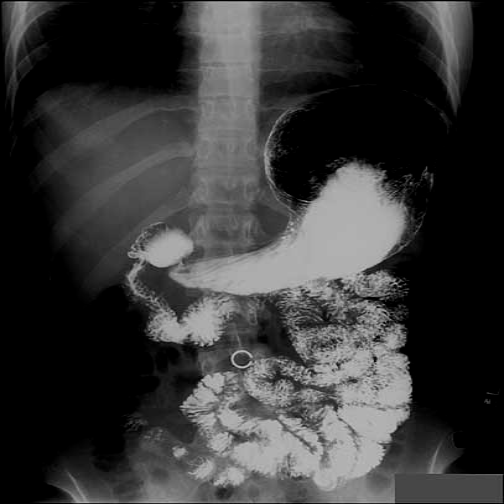

Decimación


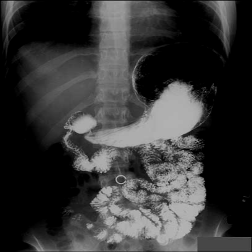

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import color

# se lee a blanco y negro
image = cv2.imread("/content/imagenes2/abdomen.png",0)
print(image.shape)

height, width = image.shape
if height != width:
  image = cv2.resize(image, (height,height))
  print("Redimensionado a ",image.shape)

image = np.array(image,dtype="uint8")

def decimacion(img):
  """Función Decimación
  Reduce a la mitad una imagen, promediando sus pixeles en grupos de 4
  
  Parámetros
  img: ndarray de numpy, representación de una imagen en blanco y negro
  
  return nuevo ndarray con la imagen reducida
  """
  # Encontramos las dimensiones de la imagen, deben ser las mismas
  height, width = img.shape
  print("Tamaño original",height,width)
  
  nuevoArreglo = list()
  for renglon in range(0,height-1,2):
    nuevoRenglon = list()
    for columna in range(0,width-1,2):
      suma = int(img[renglon,columna]) + int(img[renglon,columna+1]) \
      + int(img[renglon+1,columna]) + int(img[renglon+1,columna+1])
      nuevoRenglon.append(int(suma/4))
    nuevoArreglo.append(nuevoRenglon)

  return np.array(nuevoArreglo)

# Usando la función
nuevo = decimacion(image)
print("Tamaño nuevo",nuevo.shape)

# Imprimiendo las imagenes
print("Nueva")
cv2_imshow(image)
print("Decimación")
cv2_imshow(nuevo)

## 4.3.Usando funciones de Python ya existentes y la imagen que usted escoja.

### **4.3.1.**Reajusta el tamaño de la carpeta imágenes a 10 veces su tamaño original

In [ ]:
import numpy as np
import cv2

# Se ocupa, Colab tiene deshabilitado el imshow de opencv, crashea las sesiones
from google.colab.patches import cv2_imshow

# para cada imagen
for imagePath in listaImagenes:
  if not (imagePath.endswith(".dcm") or imagePath.endswith(".raw")):
    img = cv2.imread(imagePath)
    print(imagePath)
    height = np.size(img, 0)
    width = np.size(img, 1)
    print("Height = "+ str(height) + " Width = "+ str(width))
    cv2_imshow(img)
    ##Redimensionamos
    rszImg = cv2.resize(img, (0,0), fx=10, fy=10)
    height = np.size(rszImg, 0)
    width = np.size(rszImg, 1)
    print("Height = "+ str(height) + " Width = "+ str(width))
    # Guardamos imagen
    #cv2.imwrite("/content/image.png",rszImg)
    #Mostramos imagen
    cv2_imshow(rszImg)

#https://www.delftstack.com/es/howto/python/resize-image-python/#:~:text=Para%20cambiar%20el%20tama%C3%B1o%20de%20una%20imagen%2C%20primero%20leeremos%20la,como%20se%20muestra%20a%20continuaci%C3%B3n.&text=imread()%20devuelve%20un%20array,con%20la%20funci%C3%B3n%20resize()%20. 
#https://pythonexamples.org/python-opencv-cv2-resize-image/

### **4.3.2.**Reajusta el tamaño de la carpeta imágenes a 3 veces el tamaño original.

In [ ]:
import numpy as np
import cv2

# Se ocupa, Colab tiene deshabilitado el imshow de opencv, crashea las sesiones
from google.colab.patches import cv2_imshow

# para cada imagen
for imagePath in listaImagenes:
  if not (imagePath.endswith(".dcm") or imagePath.endswith(".raw")):
    img = cv2.imread(imagePath,)
    print(imagePath)
    height = np.size(img, 0)
    width = np.size(img, 1)
    print("Height = "+ str(height) + " Width = "+ str(width))
    cv2_imshow(img)
    ##Redimensionamos
    rszImg = cv2.resize(img, (0,0), fx=3, fy=3)
    height = np.size(rszImg, 0)
    width = np.size(rszImg, 1)
    print("Height = "+ str(height) + " Width = "+ str(width))
    # Guardamos imagen
    #cv2.imwrite("/content/image.png",rszImg)
    #Mostramos imagen
    cv2_imshow(rszImg)

### **4.3.3.**Rote la imagen a 45, 90 y 180 grados, guárdelas en formato png.

In [ ]:
#https://omes-va.com/trasladar-rotar-escalar-recortar-una-imagen-opencv/
#Rotar en spyder, solo falata el guardado
import cv2
import numpy as np

image = cv2.imread('/content/imagenes2/retinaRGB.jpg')
ancho = image.shape[1] #columnas
alto = image.shape[0] # filas

# Matrices de Rotación
M45 = cv2.getRotationMatrix2D((ancho//2,alto//2),45,1)# 45 grados
M90 = cv2.getRotationMatrix2D((ancho//2,alto//2),90,1)# 90 grados
M180 = cv2.getRotationMatrix2D((ancho//2,alto//2),180,1)# 18 grados

# Transformación a la imagen
image45 = cv2.warpAffine(image,M45,(ancho,alto))
image90 = cv2.warpAffine(image,M90,(ancho,alto))
image180 = cv2.warpAffine(image,M180,(ancho,alto))

# impresion
print("Original")
cv2_imshow(image)
print("45 grados")
cv2_imshow(image45)
print("90 grados")
cv2_imshow(image90)
print("180 grados")
cv2_imshow(image180)

# guardar imagenes
cv2.imwrite("/content/image45.png",image45)
cv2.imwrite("/content/image90.png",image90)
cv2.imwrite("/content/image180.png",image180)


## **4.4.**Convierte la imagen peppers_color.tif a escala de grises,
### **4.4.1.**Recortela de manera que solo quede uno de los pimientos verdes en ese recorte
### **4.4.2.**Guárdela en formato .jpg.

In [ ]:
#https://omes-va.com/trasladar-rotar-escalar-recortar-una-imagen-opencv/
import cv2
from google.colab.patches import cv2_imshow

# se lee a blanco y negro
image = cv2.imread("/content/Imagenes/peppers_color.tif",0)

#Recortar una imagen
imageOut = image[180:500,183:420]#Columnas #Filas
print("Original")
cv2_imshow(image)
print("Recortada")
cv2_imshow(imageOut)

# guardando
cv2.imwrite("/content/pimientoBlancoNegro.jpg",imageOut)

## **4.5.**Un formato de imágenes sin ningún tipo de codificación se conoce como formato crudo (RAW). De la imagen “rosa800x600.raw” lea y despliegue la imagen. Tome en cuenta que esta imagen maneja la precisión de integer8 y el tamaño es de 600x800 pixeles.

In [ ]:
# para formato raw
import matplotlib.pyplot as plt
import numpy as np

# tamaño de la imagen
rows = 800
columns = 600

# leer el archivo
file = open("/content/Imagenes/rosa800x600.raw")

# comvirtiendo a un arreglo numpy
img = np.fromfile(file, dtype = np.uint8, count = rows * columns)
print("shape original:",img.shape)
print("size original:",img.size)
# cambiamos las dimensiones de la imagen
img.shape = (img.size // columns, columns)
print("new shape:",img.shape)
print("new size:",img.size)

# Mostrando la imagen
fig, ax1 = plt.subplots(1,1)
ax1.imshow(img, cmap ="gray")
Texto = """Tipo de imagen: {0}
Tamaño de imagen: {1} Bytes
Tipo de dato: {2}
Archivo: {3}""".format("raw",
                      os.stat("/content/Imagenes/rosa800x600.raw").st_size,
                      img.dtype,"rosa800x600.raw")
ax1.set_title(Texto)
ax1.axis("off")


## Ejercicios practicos

**1.Abrir y escribir una imagen a un archivo **

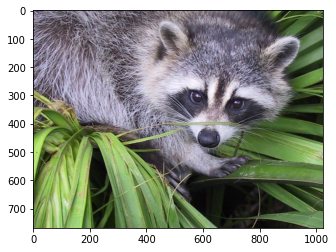

In [5]:
from scipy import misc
import imageio
f = misc.face()
imageio.imsave('face.png', f) # uses the Image module (PIL)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

**2. Creación de un arreglo numpy de un archivo de imagen **

In [6]:
from scipy import misc
import imageio
import numpy as np
face = misc.face()
imageio.imsave('face.png', face) # Se salva la imagen como png

face = imageio.imread('face.png') # Se lee la imagen pgn
type(face)      

face.shape, face.dtype

((768, 1024, 3), dtype('uint8'))

¿De qué tipo es la variable face?

¿Qué resultado arroja face.shape?

Si fuera una imagen en tonos de gris, ¿cuál sería el resultado esperado de face.shape?

3. Abrir archivos raw 

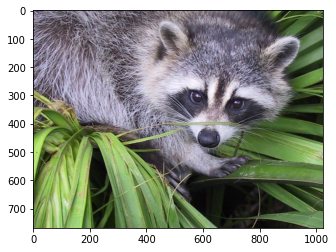

In [7]:
from scipy import misc
import imageio
import numpy as np
import matplotlib.pyplot as plt

face.tofile('face.raw') # Se crea el archivo raw binario
face_from_raw = np.fromfile('face.raw', dtype=np.uint8)

face_from_raw.shape = (768, 1024,3)

plt.imshow(face_from_raw)
plt.show()

4. Despliegue de imágenes 

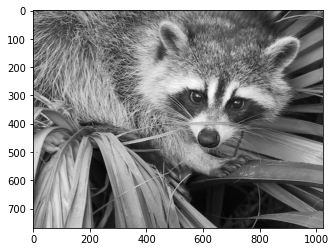

In [9]:
f = misc.face(gray=True) # Lee la imagen en escala de grises
import matplotlib.pyplot as plt
plt.imshow(f, cmap=plt.cm.gray)

¿Qué pasa si al desplegar la imagen con plt.imshow no se especifica el mapa de color plt.cm.gray?

¿Cuál es el mapa de color default de imshow?

Imprima la forma de f (propiedad shape de f) y compare contra la forma de la misma imagen a color.

(-0.5, 1023.5, 767.5, -0.5)

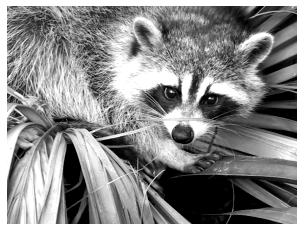

In [10]:
#Se puede incrementar el contraste especificando los valores mínimo y máximo en el despliegue:
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)
# Remueve los ejes y las marcas (ticks)
plt.axis('off')


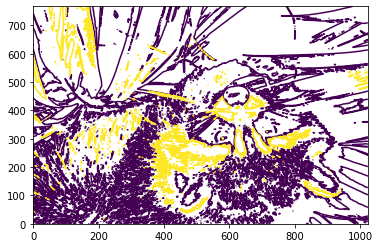

In [15]:
#Se pueden dibujar líneas de contorno con la instrucción contour.
plt.contour(f, [100, 200]) 

In [ ]:
#Investigue y ponga una breve descripción sobre la instrucción contour.
#Obtenga y despliegue los contornos de la imagen contour_gray.png con las siguientes
#instrucciones (antes debe cargar la imagen contour_gray.png en la variable f):
#f = misc.face(gray=True)
f = imageio.imread('contour_gray.png')
plt.contour(f, 5)

FileNotFoundError: ignored

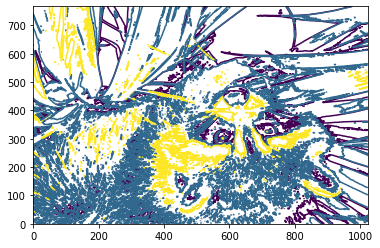

In [ ]:
plt.contour(f, [50, 100, 200])

**5. Manipulaciones básicas **

In [ ]:
# Obtiene el valor de un pixel de la imagen
face = misc.face(gray=True)
face[0, 40]
#¿Cuánto vale el pixel face[0, 40]?
#Vale 127

127

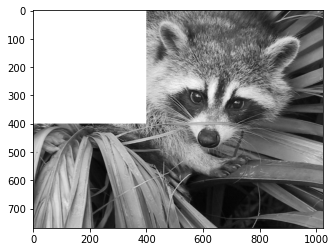

In [ ]:
# Accesando secciones de la imagen
face[10:13, 20:23]
#¿Qué efecto tiene la instrucción face[100:120] = 255 en la imagen de abajo?
face[0:400, 0:400] = 255
plt.imshow(face,cmap="gray")
plt.show()

In [ ]:
face[100:120] = 255
#¿Qué efecto tiene la instrucción face[100:120] = 255 en la imagen de abajo?

In [ ]:
#Pinte una franja vertical gris en la imagen que vaya de la columna 200 a la columna 220. Tip: en
#los índices tiene que elegir todas las filas con : y luego indicar las columnas deseadas.
lx, ly = face.shape
print(lx,ly)
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
# Masks
face[mask] = 0
# Indexado con rangos
face[range(400), range(400)] = 255
#¿Cuánto vale lx, ly?
#¿Qué efecto tiene en la imagen la instrucción face[range(400), range(400)] = 255?

768 1024


In [ ]:
#Modifique el código para que la máscara sea un círculo más pequeño y despliegue el resultado.

<BarContainer object of 256 artists>

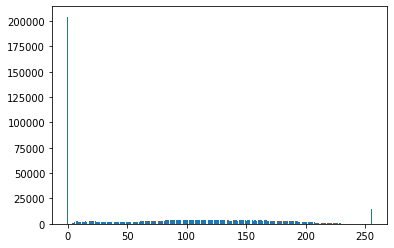

In [ ]:
#Despliegue el histograma de la imagen en grises del mapache original (es decir, antes de poner
#las franjas y de aplicar la máscara) usando:

hist, bins = np.histogram(face, bins=256, range=(0,256))
plt.bar(bins[0:-1], hist)


<BarContainer object of 64 artists>

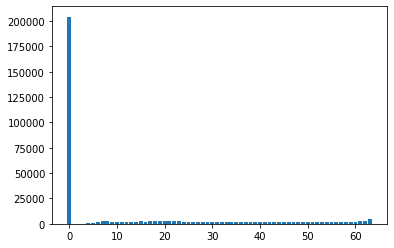

In [ ]:
#Modifique el código para que sólo se tengan 64 bins en el histograma y muestre el histograma
#resultante.
hist, bins = np.histogram(face, bins=64, range=(0,64))
plt.bar(bins[0:-1], hist)

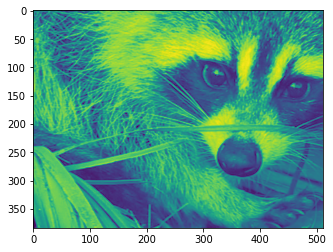

In [ ]:
#Transformaciones geométricas
from scipy import ndimage
face = misc.face(gray=True)
lx, ly = face.shape
# Recorte
crop_face = face[lx // 4: - lx // 4, ly // 4: - ly // 4]
plt.imshow(crop_face )


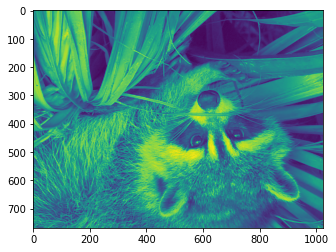

In [ ]:
# up <-> down Voltear verticalmente
flip_ud_face = np.flipud(face)
plt.imshow(flip_ud_face)

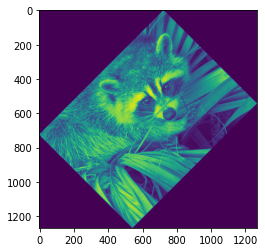

In [ ]:
# Rotación
rotate_face = ndimage.rotate(face, 45)
plt.imshow(rotate_face)

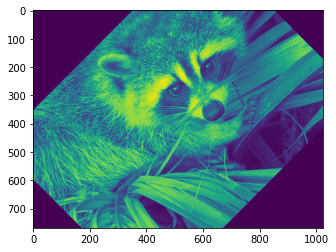

In [ ]:
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False)
plt.imshow(rotate_face_noreshape)

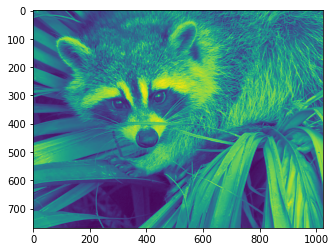

In [ ]:
# up <-> down Voltear horizontalmente
flip_ud_face = np.fliplr(face)
plt.imshow(flip_ud_face)